In [1]:
import ternary
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

In [3]:
def draw_ternary_ps(data_file, target_file = None, name = None):
    
    raw = np.genfromtxt(data_file, 
                        delimiter=',', 
                        skip_header = False)

    scale = 100
    fontsize = 12
    axis_fontsize = 8
    
    coord = raw[:,0:3] * 100
    coord = np.rint(coord)
    coord = coord.astype(int)
    
    value_u = raw[:,3]
    value_l = raw[:,4]
    
    value_u_target = []
    value_l_target = []
    if target_file is not None:
        raw_target = np.genfromtxt(target_file, 
                            delimiter=',', 
                            skip_header = False)
        temp_u_target = raw_target[:,3]
        temp_l_target = raw_target[:,4]
        
        for i in range(len(temp_u_target)):
            #if temp_u_target[i] > temp_l_target[i]:
            value_u_target.append(temp_u_target[i])
            value_l_target.append(temp_l_target[i])
    
    data_u = dict()
    data_l = dict()
    data_u_diff = dict()
    data_l_diff = dict()
    
    count = 0
    for i in range(coord.shape[0]):
        index_i = coord[i][0]
        index_j = coord[i][1]
        index_k = coord[i][2]
        
        if value_u[i] > value_l[i] and value_u[i] > 1.0 and value_l[i] > 0.0:   
            data_u[(index_i, index_j)] = value_u[i]
            data_l[(index_i, index_j)] = value_l[i]
            count += 1
                
        if target_file is not None:
            if value_u_target[i] > value_l_target[i]:
                data_u_diff[(index_i, index_j)] = np.fabs(value_u[i] - value_u_target[i])
                
                if value_l_target[i] > 1.0:
                    data_l_diff[(index_i, index_j)] = np.fabs(value_l[i] - value_l_target[i])
            
    
    print count
    print len(data_u_diff)
    print len(data_l_diff)
    
    figure, tax = ternary.figure(scale = scale)
    tax.boundary(linewidth=2.0)
    tax.heatmap(data_u, style = 't', cmap="rainbow",  
                cbarlabel = "$P_{s,u}$, atm")
    tax.set_title("$C_1/C_6/C_{10}$ System Upper Saturation Pressure",
                  fontsize=fontsize)
    tax.gridlines(color="black", multiple=20)
    tax.left_axis_label("$C_{10}$", fontsize=fontsize)
    tax.right_axis_label("$C_{6}$", fontsize=fontsize)
    tax.bottom_axis_label("$C_{1}$", fontsize=fontsize)
    tax.clear_matplotlib_ticks()
    tax.ticks(axis='lbr', multiple = 20, linewidth=1, fontsize = axis_fontsize)
    tax._redraw_labels()
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    tax.show()
    
    plot_name = "ternary_"
    if name is None:
        plot_name = plot_name + "Psu.eps"
    else:
        plot_name = plot_name + "Psu_" + name + ".eps"
    tax.savefig(plot_name)
    
    plot_name = "ternary_"
    if name is None:
        plot_name = plot_name + "Psu.pdf"
    else:
        plot_name = plot_name + "Psu_" + name + ".pdf"
    tax.savefig(plot_name)
    

        
    figure, tax = ternary.figure(scale = scale)
    tax.boundary(linewidth=2.0)
    tax.heatmap(data_l, style = 't', cmap="rainbow", cbarlabel = "$P_{s,l}$, atm")
    tax.set_title("$C_1/C_6/C_{10}$ System Lower Saturation Pressure", 
                  fontsize=fontsize)
    tax.gridlines(color="black", multiple=20)
    tax.left_axis_label("$C_{10}$", fontsize=fontsize)
    tax.right_axis_label("$C_{6}$", fontsize=fontsize)
    tax.bottom_axis_label("$C_{1}$", fontsize=fontsize)
    tax.clear_matplotlib_ticks()
    tax.ticks(axis='lbr', multiple = 20, linewidth=1, fontsize = axis_fontsize)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    tax.show()
    
    plot_name = "ternary_"
    if name is None:
        plot_name = plot_name + "Psl.eps"
    else:
        plot_name = plot_name + "Psl_" + name + ".eps"
    tax.savefig(plot_name)
    
    plot_name = "ternary_"
    if name is None:
        plot_name = plot_name + "Psl.pdf"
    else:
        plot_name = plot_name + "Psl_" + name + ".pdf"
    tax.savefig(plot_name)
    
    if target_file is not None:
        figure, tax = ternary.figure(scale = scale)
        tax.boundary(linewidth=2.0)
        tax.heatmap(data_u_diff, style = 't', cmap="rainbow",  
                    cbarlabel = "$\|P_{s,u} - P^*_{s,u}\|$, atm")
        tax.set_title("$C_1/C_6/C_{10}$ System Upper Saturation Pressure Difference",
                      fontsize=fontsize)
        tax.gridlines(color="black", multiple=20)
        tax.left_axis_label("$C_{10}$", fontsize=fontsize)
        tax.right_axis_label("$C_{6}$", fontsize=fontsize)
        tax.bottom_axis_label("$C_{1}$", fontsize=fontsize)
        tax.clear_matplotlib_ticks()
        tax.ticks(axis='lbr', multiple = 20, linewidth=1, fontsize = axis_fontsize)
        tax._redraw_labels()
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
        tax.show()
    
        plot_name = "ternary_"
        if name is None:
            plot_name = plot_name + "Psu_diff.eps"
        else:
            plot_name = plot_name + "Psu_diff" + name + ".eps"
        tax.savefig(plot_name)
    
        plot_name = "ternary_"
        if name is None:
            plot_name = plot_name + "Psu_diff.pdf"
        else:
            plot_name = plot_name + "Psu_diff" + name + ".pdf"
        tax.savefig(plot_name)
        
        figure, tax = ternary.figure(scale = scale)
        tax.boundary(linewidth=2.0)
        tax.heatmap(data_l_diff, style = 't', cmap="rainbow", 
                    cbarlabel = "$\|P_{s,l} - P^*_{s,l}\|$, atm")
        tax.set_title("$C_1/C_6/C_{10}$ System Lower Saturation Pressure Difference", 
                      fontsize=fontsize)
        tax.gridlines(color="black", multiple=20)
        tax.left_axis_label("$C_{10}$", fontsize=fontsize)
        tax.right_axis_label("$C_{6}$", fontsize=fontsize)
        tax.bottom_axis_label("$C_{1}$", fontsize=fontsize)
        tax.clear_matplotlib_ticks()
        tax.ticks(axis='lbr', multiple = 20, linewidth=1, fontsize = axis_fontsize)
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
        tax.show()
    
        plot_name = "ternary_"
        if name is None:
            plot_name = plot_name + "Psl_diff.eps"
        else:
            plot_name = plot_name + "Psl_diff" + name + ".eps"
        tax.savefig(plot_name)
    
        plot_name = "ternary_"
        if name is None:
            plot_name = plot_name + "Psl_diff.pdf"
        else:
            plot_name = plot_name + "Psl_diff" + name + ".pdf"
        tax.savefig(plot_name)

3024
2971
2904


<IPython.core.display.Javascript object>


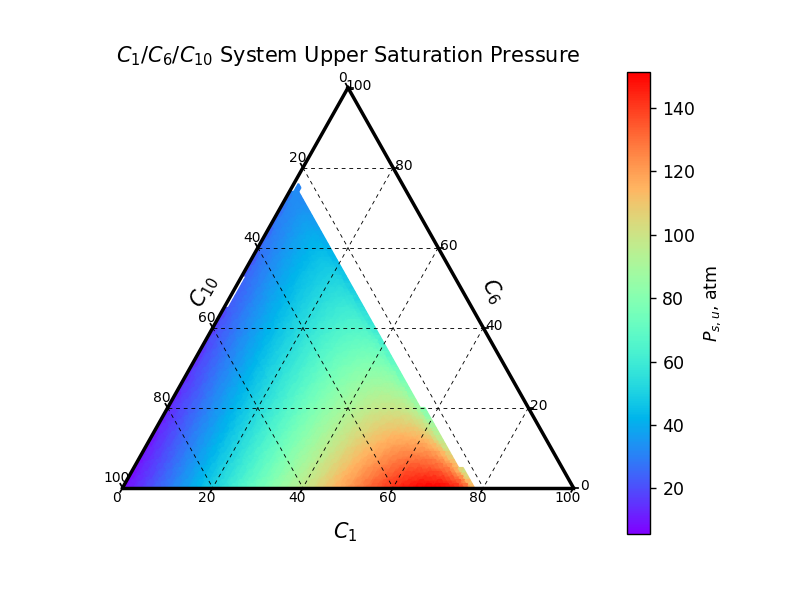

<IPython.core.display.Javascript object>


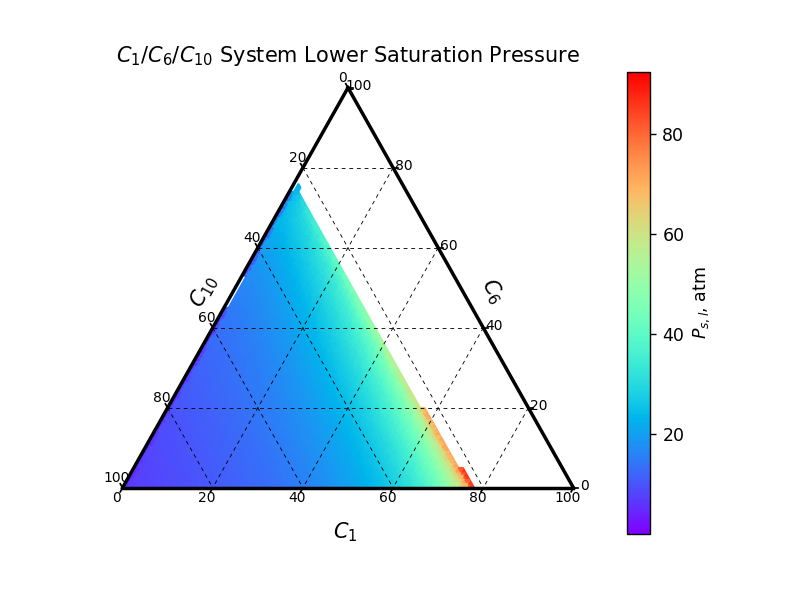

<IPython.core.display.Javascript object>


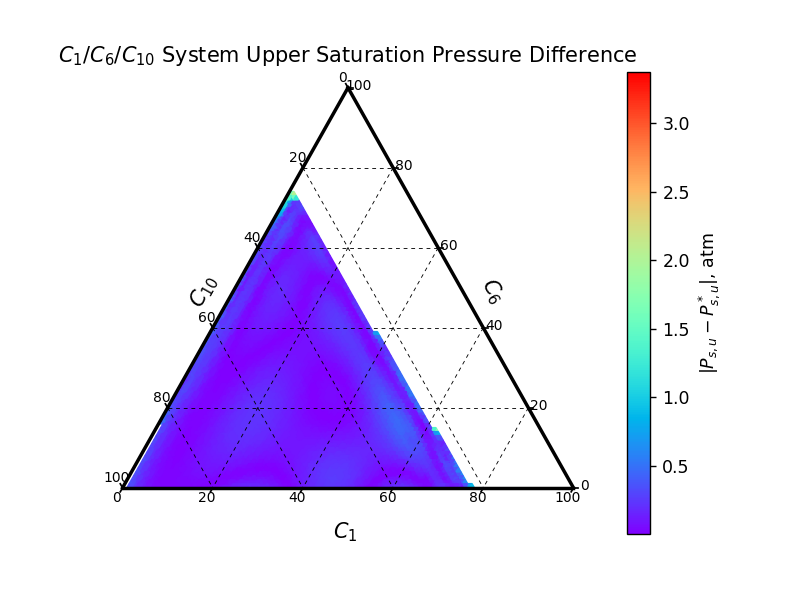

<IPython.core.display.Javascript object>


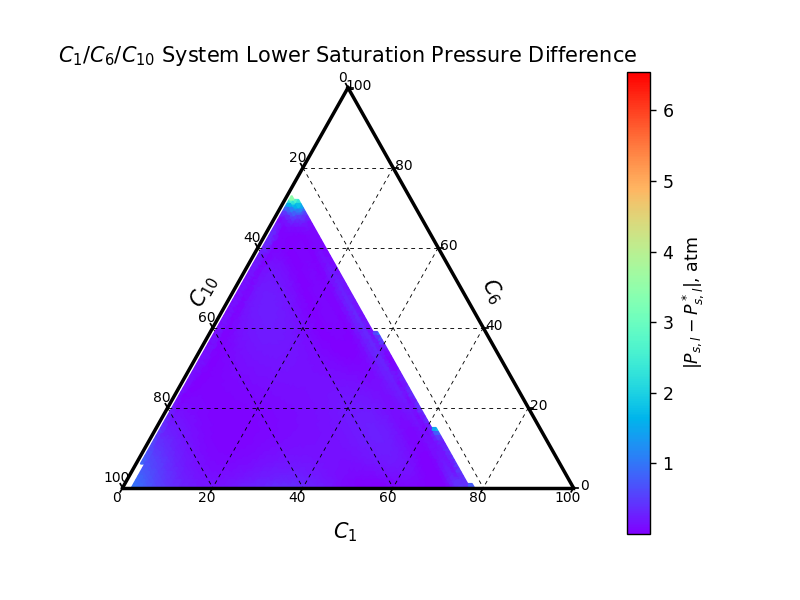

In [30]:
draw_ternary_ps("ps-prediction.csv", target_file = "improved-STAB-data/PM-simplex-T550-simplex-PS-PM.csv")

2980
2980


<IPython.core.display.Javascript object>


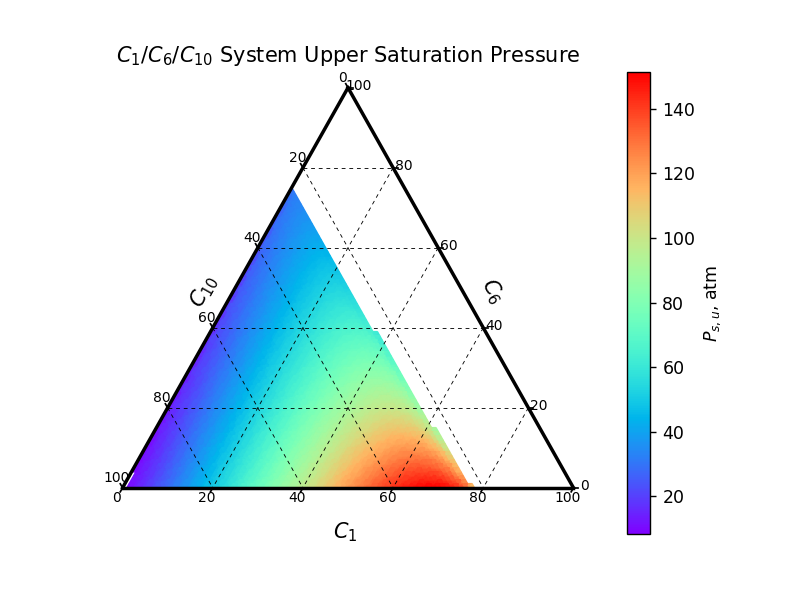

<IPython.core.display.Javascript object>


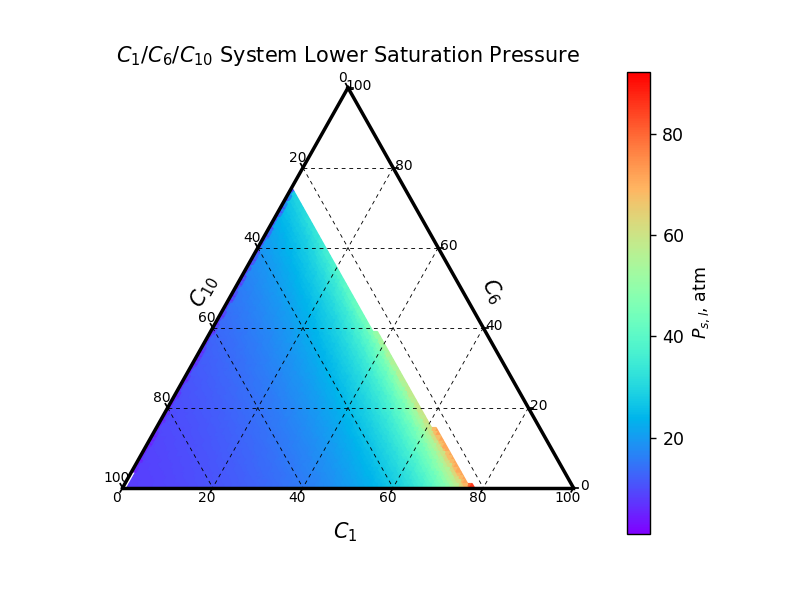

In [7]:
draw_ternary_ps("PM-simplex-T550-simplex-PS-PM.csv")

In [ ]:
begin = [350, 375, 400, 425, 450, 475, 500, 525, 550]
for i in begin:
    file_name = "PM-simplex-T" + str(i) + "-simplex-PS-PM.csv"
    plot_name = "T" + str(i)
    
    print file_name, plot_name
    draw_ternary_ps(file_name, name = plot_name)

In [5]:
raw = np.genfromtxt("PM-simplex-T550-simplex-PS-PM.csv", delimiter=',', skip_header = False)

coord = raw[:,0:3] * 100
coord = np.rint(coord)
coord = coord.astype(int)

In [6]:
value_u = raw[:,3]

data_u = dict()
for i in range(coord.shape[0]):
    index_i = coord[i][0]
    index_j = coord[i][1]
    index_k = coord[i][2]
    data_u[(index_i, index_j)] = value_u[i]

In [7]:
scale = 100
fontsize = 12
axis_fontsize = 8

<IPython.core.display.Javascript object>


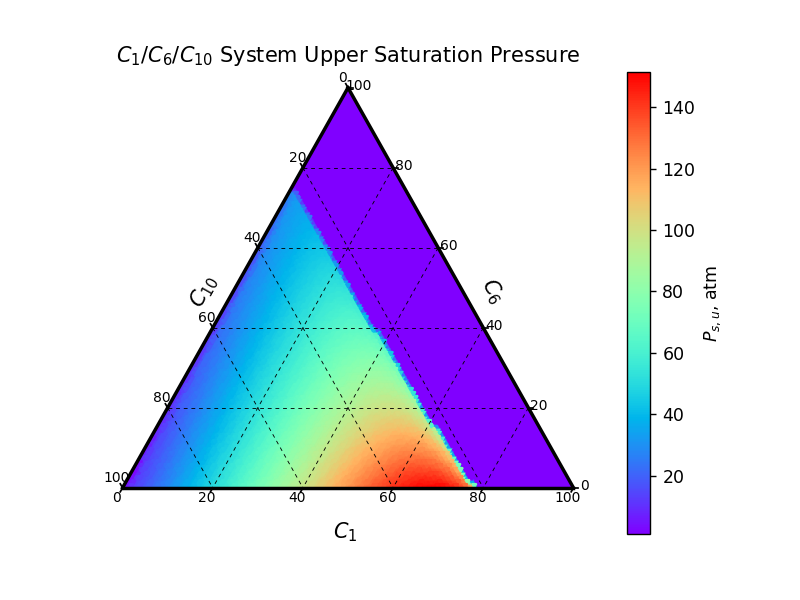

In [6]:
figure, tax = ternary.figure(scale = scale)
tax.boundary(linewidth=2.0)
tax.heatmap(data_u, style = 't', cmap="rainbow",  cbarlabel = "$P_{s,u}$, atm")
tax.set_title("$C_1/C_6/C_{10}$ System Upper Saturation Pressure",
              fontsize=fontsize)
tax.gridlines(color="black", multiple=20)
tax.left_axis_label("$C_{10}$", fontsize=fontsize)
tax.right_axis_label("$C_{6}$", fontsize=fontsize)
tax.bottom_axis_label("$C_{1}$", fontsize=fontsize)
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', multiple = 20, linewidth=1, fontsize = axis_fontsize)
tax._redraw_labels()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
tax.show()

In [7]:
tax.savefig("ternary_Psu.eps")
tax.savefig("ternary_Psu.pdf")

In [8]:
value_l = raw[:,4]

data_l = dict()
for i in range(coord.shape[0]):
    index_i = coord[i][0]
    index_j = coord[i][1]
    index_k = coord[i][2]
    data_l[(index_i, index_j)] = value_l[i]

In [9]:
figure, tax = ternary.figure(scale = scale)
tax.boundary(linewidth=2.0)
tax.heatmap(data_l, style = 't', cmap="rainbow", cbarlabel = "$P_{s,l}$, atm")
tax.set_title("$C_1/C_6/C_{10}$ System Lower Saturation Pressure", 
              fontsize=fontsize)
tax.gridlines(color="black", multiple=20)
tax.left_axis_label("$C_{10}$", fontsize=fontsize)
tax.right_axis_label("$C_{6}$", fontsize=fontsize)
tax.bottom_axis_label("$C_{1}$", fontsize=fontsize)
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', multiple = 20, linewidth=1, fontsize = axis_fontsize)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
tax.show()

<IPython.core.display.Javascript object>

In [10]:
tax.savefig("ternary_Psl.eps")
tax.savefig("ternary_Psl.pdf")

In [11]:
value_diff = value_u - value_l
data_zone = dict()
for i in range(coord.shape[0]):
    index_i = coord[i][0]
    index_j = coord[i][1]
    index_k = coord[i][2]
    data_zone[(index_i, index_j)] = value_diff[i]

In [12]:
figure, tax = ternary.figure(scale = scale)
tax.boundary(linewidth=2.0)
tax.heatmap(data_zone, style = 't', cmap="rainbow", cbarlabel = "$P_{s,u} - P_{s,l}$, atm")
tax.set_title("Ternary System ($C_1/C_6/C_{10}$)", 
              fontsize=fontsize)
tax.gridlines(color="black", multiple=20)
tax.left_axis_label("$C_{10}$", fontsize=fontsize)
tax.right_axis_label("$C_{6}$", fontsize=fontsize)
tax.bottom_axis_label("$C_{1}$", fontsize=fontsize)
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', multiple = 20, linewidth=1, fontsize = axis_fontsize)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
tax.show()

<IPython.core.display.Javascript object>

In [13]:
tax.savefig("ternary_diff.eps")
tax.savefig("ternary_diff.pdf")

In [14]:
value_diff = value_u - value_l

#points = [[33, 33, 34], [20, 30, 50], [30, 20, 50]]
points = []
for i in range(coord.shape[0]):
    index_i = coord[i][0]
    index_j = coord[i][1]
    index_k = coord[i][2]
    
    if value_diff[i] <= 0.0:
        points.append([coord[i][0], coord[i][1], coord[i][2]])
figure, tax = ternary.figure(scale = scale)

tax.heatmap(data_zone, style = 't', cmap="rainbow", cbarlabel = "")
tax.scatter(points, marker='D', color='white', label="Stable Region")
tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=20)
tax.left_axis_label("$C_{10}$", fontsize=fontsize)
tax.right_axis_label("$C_{6}$", fontsize=fontsize)
tax.bottom_axis_label("$C_{1}$", fontsize=fontsize)
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', multiple = 20, linewidth=1, fontsize = axis_fontsize)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#tax.plot(points, linewidth=3.0, color = 'white', label="Curve")
tax.show()

<IPython.core.display.Javascript object>

In [20]:
x = raw[:, 0]
y = raw[:, 1]

rotate_x = []
rotate_y = []
z_zero = []
z_30 = []
z_100 = []
for x0, y0 in zip(x, y):
    new_x = x0 + y0 * np.cos(np.pi / 3.0)
    new_y = y0 * np.sin(np.pi / 3.0)
    rotate_x.append(new_x)
    rotate_y.append(new_y)
    z_zero.append(0.0)
    z_30.append(30.0)
    z_100.append(100.0)

<IPython.core.display.Javascript object>


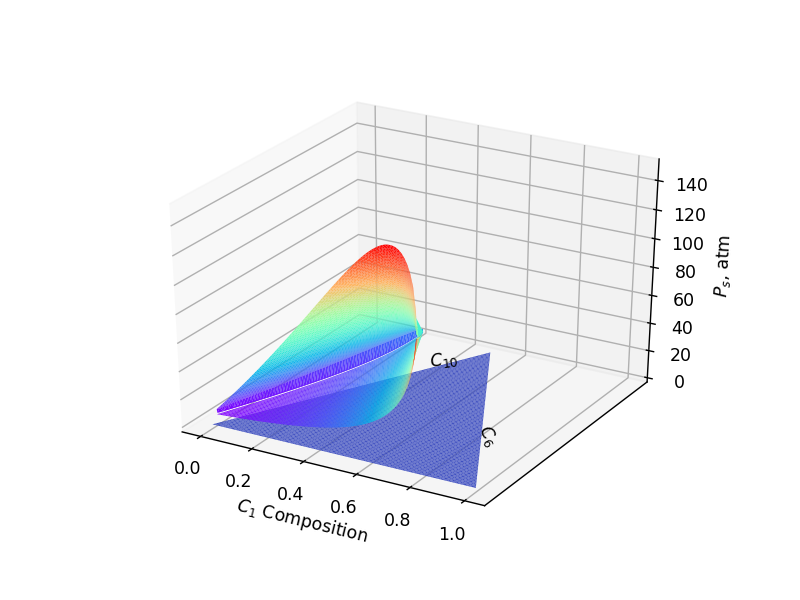

In [10]:

zz_u = raw[:,3]
coord_y_u = []
coord_x_u = []
coord_z_u = []
for x0, y0, zz0 in zip(rotate_x, rotate_y, zz_u):
    if zz0 > 1.0:
        coord_x_u.append(x0)
        coord_y_u.append(y0)
        coord_z_u.append(zz0)

zz_l = raw[:,4]
coord_y_l = []
coord_x_l = []
coord_z_l = []
for x0, y0, zz0 in zip(rotate_x, rotate_y, zz_l):
    if zz0 > 1.0:
        coord_x_l.append(x0)
        coord_y_l.append(y0)
        coord_z_l.append(zz0)
fig_ps = plt.figure()
ax = fig_ps.gca(projection='3d')
ax.set_xlabel("$C_1$ Composition")
ax.set_zlabel("$P_s$, atm")
#ax.grid(False)
#ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([])
#ax.set_zticks([0, 30, 60, 90, 120, 150])
#ax.set_zlim(0, 150)
ax.plot_trisurf(coord_x_u, coord_y_u, coord_z_u, 
                cmap="rainbow", linewidth=0.2, antialiased=True)
ax.plot_trisurf(coord_x_l, coord_y_l, coord_z_l, 
                cmap="rainbow", linewidth=0.2, antialiased=True)
ax.plot_trisurf(rotate_x, rotate_y, z_zero,
                cmap="coolwarm")
text_x = 0.8
text_y = 0.3
text_z = 0.0
label = "$C_6$"
zdir = (1, -0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)

text_x = 0.36
text_y = 0.7
text_z = 0.0
label = "$C_{10}$"
zdir = (1, 0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)

In [17]:
fig_ps.savefig("ternary_ps_3d.eps")
fig_ps.savefig("ternary_ps_3d.pdf")

<IPython.core.display.Javascript object>


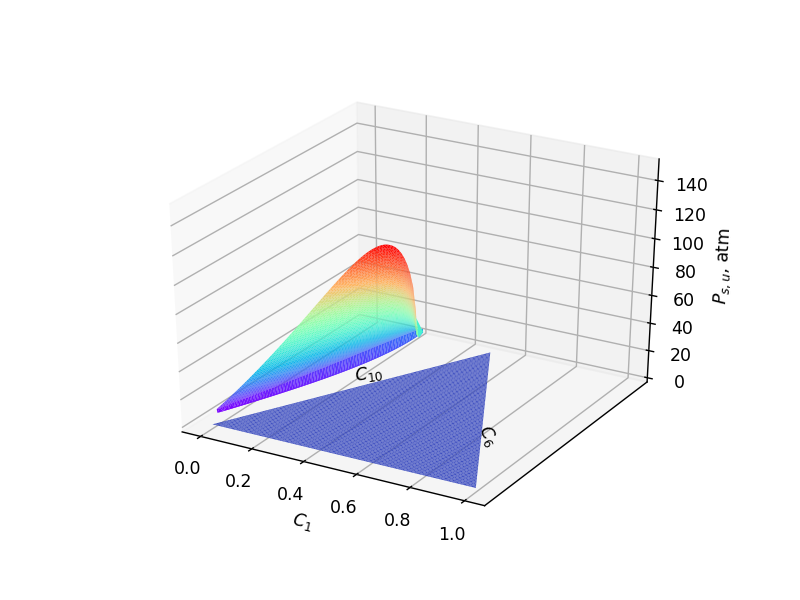

In [28]:
fig_psu = plt.figure()
ax = fig_psu.gca(projection='3d')
ax.set_xlabel("$C_1$")
ax.set_zlabel("$P_{s,u}$, atm")
#ax.grid(False)
#ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([])
#ax.set_zticks([0, 30, 60, 90, 120, 150])
#ax.set_zlim(0, 150)
ax.plot_trisurf(coord_x_u, coord_y_u, coord_z_u, 
                cmap="rainbow", linewidth=0.2, antialiased=True)
ax.plot_trisurf(rotate_x, rotate_y, z_zero,
                cmap="coolwarm")
text_x = 0.8
text_y = 0.3
text_z = 0.0
label = "$C_6$"
zdir = (1, -0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)

text_x = 0.2
text_y = 0.5
text_z = 0.0
label = "$C_{10}$"
zdir = (1, 0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)

In [19]:
fig_psu.savefig("ternary_psu_3d.eps")
fig_psu.savefig("ternary_psu_3d.pdf")

In [20]:
fig_psl = plt.figure()
ax = fig_psl.gca(projection='3d')
ax.set_xlabel("$C_1$ Composition")
ax.set_zlabel("$P_{s,l}$, atm")
#ax.grid(False)
#ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([])
ax.set_zticks([0, 30, 60, 90, 120, 150])
ax.set_zlim(0, 150)
ax.plot_trisurf(coord_x_l, coord_y_l, coord_z_l, 
                cmap="rainbow", linewidth=0.2, antialiased=True)
ax.plot_trisurf(rotate_x, rotate_y, z_zero,
                cmap="coolwarm")
text_x = 0.8
text_y = 0.3
text_z = 0.0
label = "$C_6$"
zdir = (1, -0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)

text_x = 0.36
text_y = 0.7
text_z = 0.0
label = "$C_{10}$"
zdir = (1, 0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)

<IPython.core.display.Javascript object>

In [21]:
fig_psl.savefig("ternary_psl_3d.eps")
fig_psl.savefig("ternary_psl_3d.pdf")

In [11]:
raw_split = np.genfromtxt("PM-simplex-T550-simplex-SPLIT-PM.csv", 
                          delimiter=',', skip_header = False)
xs = raw_split[:,0]
ys = raw_split[:,1]
zs = raw_split[:,3]
fv = raw_split[:,4]
K1 = raw_split[:,5]

In [12]:
xs = xs[np.where(fv > 0.00001)]
ys = ys[np.where(fv > 0.00001)]
zs = zs[np.where(fv > 0.00001)]
fv = fv[np.where(fv > 0.00001)]
xs = xs[np.where(fv < 0.99999)]
ys = ys[np.where(fv < 0.99999)]
zs = zs[np.where(fv < 0.99999)]
fv = fv[np.where(fv < 0.99999)]

In [31]:
print len(xs), len(xs_selected)

37081 27100


<IPython.core.display.Javascript object>


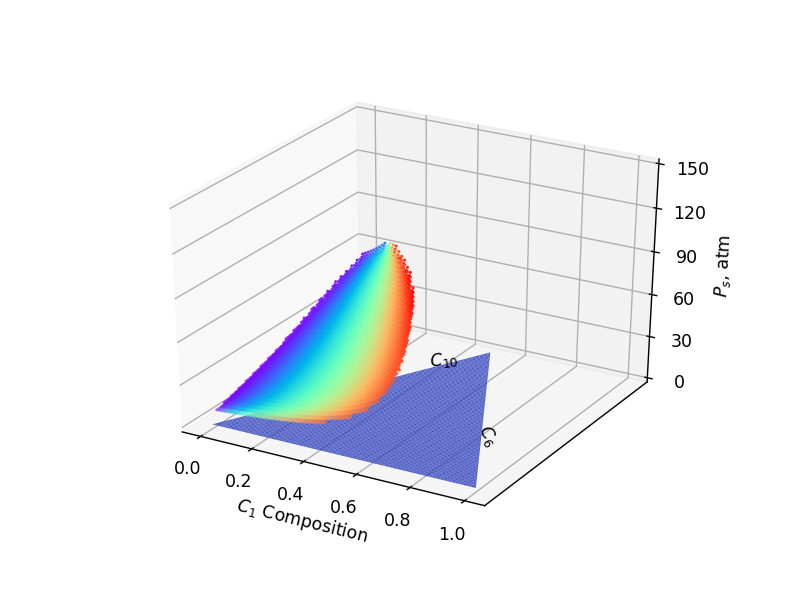

/home/wangkun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [13]:
fig_split = plt.figure()
ax = fig_split.add_subplot(111, projection='3d')
p = ax.scatter(xs, ys, zs, c = fv, marker = "o", 
           cmap = 'rainbow', s = 0.5)
#fig_split.colorbar(p)
ax.set_xlabel("$C_1$ Composition")
ax.set_zlabel("$P_s$, atm")
#ax.grid(False)
#ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([])
ax.set_zticks([0, 30, 60, 90, 120, 150])
ax.set_zlim(0, 150)
ax.plot_trisurf(rotate_x, rotate_y, z_zero,
                cmap="coolwarm")
text_x = 0.8
text_y = 0.3
text_z = 0.0
label = "$C_6$"
zdir = (1, -0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)

text_x = 0.36
text_y = 0.7
text_z = 0.0
label = "$C_{10}$"
zdir = (1, 0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)
ax.legend()
plt.show()

In [14]:
fig_split.savefig("ternary_split_data.eps")
fig_split.savefig("ternary_split_data.pdf")

In [18]:
xs_selected = []
ys_selected = []
zs_selected = []
fv_selected = []

for xs0, ys0, zs0, fv0 in zip(xs, ys, zs, fv):
    if zs0 < 100.0 and zs0 > 30.0:
        xs_selected.append(xs0)
        ys_selected.append(ys0)
        zs_selected.append(zs0)
        fv_selected.append(fv0)

<IPython.core.display.Javascript object>


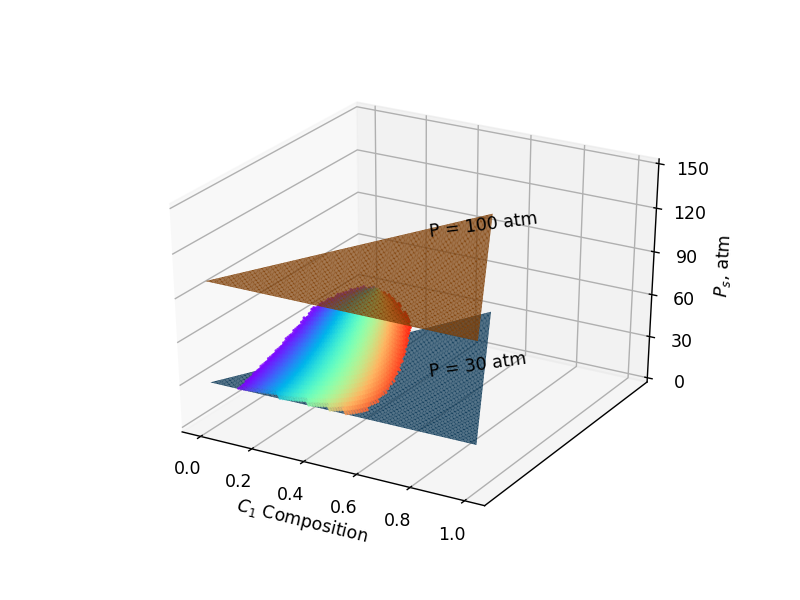

In [27]:
fig_split = plt.figure()
ax = fig_split.add_subplot(111, projection='3d')
p = ax.scatter(xs_selected, ys_selected, zs_selected, 
               c = fv_selected, marker = "o", cmap = 'rainbow', 
               s = 0.5)
#fig_split.colorbar(p)
ax.set_xlabel("$C_1$ Composition")
ax.set_zlabel("$P_s$, atm")
#ax.grid(False)
#ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([])
ax.set_zticks([0, 30, 60, 90, 120, 150])
ax.set_zlim(0, 150)
#ax.plot_trisurf(rotate_x, rotate_y, z_zero,
#                cmap="coolwarm")
ax.plot_trisurf(rotate_x, rotate_y, z_30)
ax.plot_trisurf(rotate_x, rotate_y, z_100)
text_x = 0.36
text_y = 0.7
text_z = 100.0
label = "P = 100 atm"
zdir = (1, 0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)

text_x = 0.36
text_y = 0.7
text_z = 0.0
label = "P = 30 atm"
zdir = (1, 0.86, 0)
ax.text(text_x, text_y, text_z, label, zdir)
ax.legend()
plt.show()

In [28]:
fig_split.savefig("selected_split_data.eps")
fig_split.savefig("selected_split_data.pdf")

In [ ]:
n = 101
tt = []
count = 0
mask_stable = []
for i in range(n, 0, -1):
    for j in range(i - 1):
        index_1 = count + j
        index_2 = count + j + 1
        index_3 = count + i + j
        
        tt.append([index_1, index_2, index_3])
        
        count_zero = 0
        if zz_u[index_1] - zz_l[index_1] > 1.0:
            count_zero += 1
        if zz_u[index_2] - zz_l[index_2] > 1.0:
            count_zero += 1
        if zz_u[index_3] - zz_l[index_3] > 1.0:
            count_zero += 1
        if count_zero >= 2:
            mask_stable.append(False)
        else:
            mask_stable.append(True)
        
    for j in range(i - 2):
        index_1 = count + j + 1
        index_2 = count + i + j + 1
        index_3 = count + i + j
        
        tt.append([index_1, index_2, index_3])
        
        count_zero = 0
        if zz_u[index_1] - zz_l[index_1] > 1.0:
            count_zero += 1
        if zz_u[index_2] - zz_l[index_2] > 1.0:
            count_zero += 1
        if zz_u[index_3] - zz_l[index_3] > 1.0:
            count_zero += 1
        if count_zero >= 2:
            mask_stable.append(False)
        else:
            mask_stable.append(True)
    
    count += i
        
        

<IPython.core.display.Javascript object>


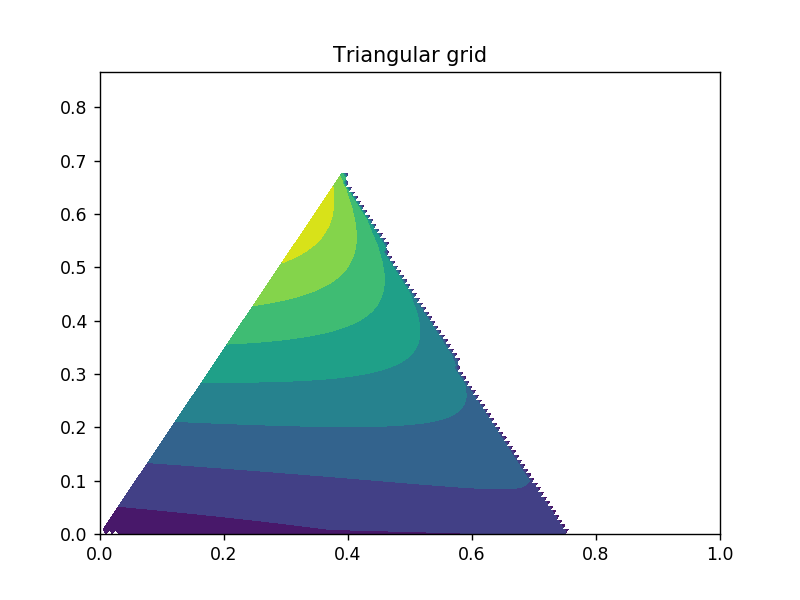

In [183]:
triang = mtri.Triangulation(rotate_x, rotate_y, tt)
fig= plt.figure()
#plt.triplot(triang, 'ko-')
plt.title('Triangular grid')
triang.set_mask(mask_stable)
plt.tricontourf(triang, zz_u, mask = mask_stable)

<IPython.core.display.Javascript object>


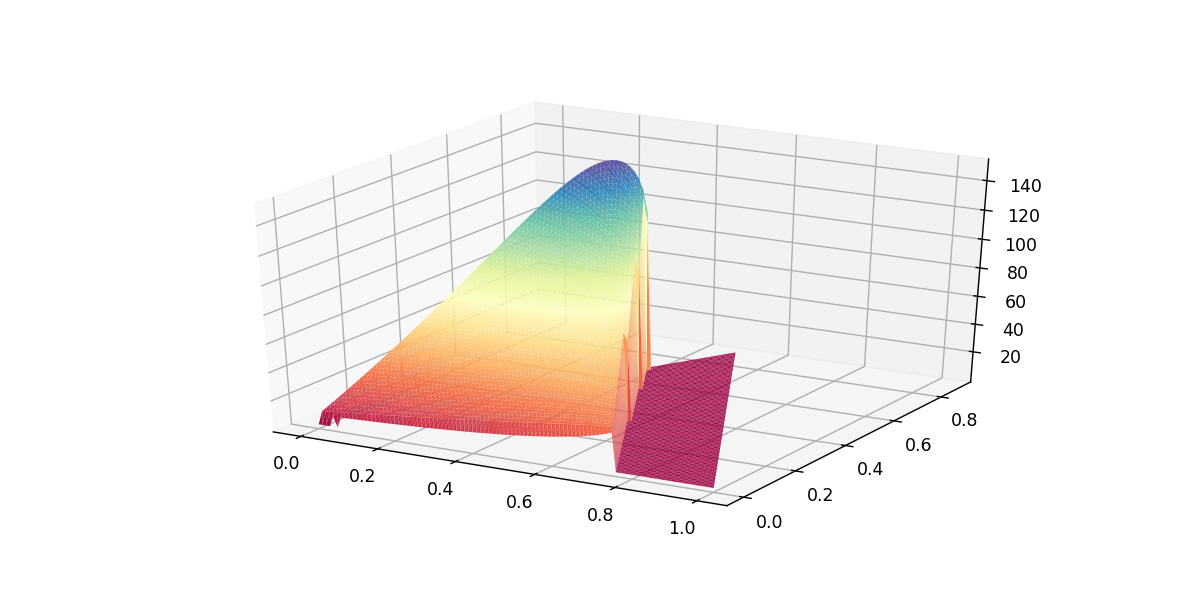

In [136]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_trisurf(rotate_x, rotate_y, zz, triangles=triang.triangles, cmap=plt.cm.Spectral)